# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [257]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [258]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [262]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)


### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [263]:
# Create a Beautiful Soup Object
html = browser.html 
soup = BeautifulSoup(html, 'html.parser')

In [264]:
# Extract all rows of data
table = soup.find('table', class_='table')


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [265]:
# Create an empty list
headers = [header.text.strip() for header in table.find_all('th')]
rows = []
# Loop through the scraped data to create a list of rows
for row in table.find_all('tr'):
    cells = row.find_all('td')
    # Only add rows that have cell data
    if cells:
        rows.append([cell.text.strip() for cell in cells])
            
# Create a DataFrame
mars_table_df = pd.DataFrame(rows, columns=headers)

# Display the scraped table
mars_table_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [266]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.read_html('https://static.bc-edx.com/data/web/mars_facts/temperature.html')
mars_df = df[0]


In [267]:
# Confirm DataFrame was created successfully
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [268]:
# Examine data type of each column
df_type = mars_table_df.dtypes
df_type

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [269]:
# Change data types for data analysis
Change_dict = {'sol': int,
             'ls': int, 
             'month': int,
             'min_temp': float,
             'pressure': float
            }
df_analytics = mars_table_df.astype(Change_dict)
df_analytics['terrestrial_date'] = pd.to_datetime(df_analytics["terrestrial_date"])

In [270]:
# Confirm type changes were successful by examining data types again
print(df_analytics.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


In [271]:
# Print Dataframe
mars_table_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [272]:
# 1. How many months are there on Mars?
mars_months = mars_table_df['month'].nunique()
mars_months

12

In [273]:
# 2. How many sols (Martian days) worth of data are there?
sol_days = mars_table_df['sol'].nunique()
sol_days

1867

In [274]:
# 3. What is the average minimum temperature by month?
# Convert the 'min_temp' column to numeric, forcing errors to NaN
mars_table_df['min_temp'] = pd.to_numeric(mars_table_df['min_temp'], errors='coerce')
avg_temp = mars_table_df.groupby("month")["min_temp"].mean().reset_index()

# Rename columns for clarity
avg_temp.columns = ['month', 'average_min_temp']

# Convert month to integer to ensure proper sorting
avg_temp['month'] = avg_temp['month'].astype(int)

# Sort the average temperature DataFrame by month
avg_temp_sorted = avg_temp.sort_values(by='month')
avg_temp_sorted = avg_temp_sorted.set_index("month")

# Display the sorted results
print(avg_temp_sorted)

       average_min_temp
month                  
1            -77.160920
2            -79.932584
3            -83.307292
4            -82.747423
5            -79.308725
6            -75.299320
7            -72.281690
8            -68.382979
9            -69.171642
10           -71.982143
11           -71.985507
12           -74.451807


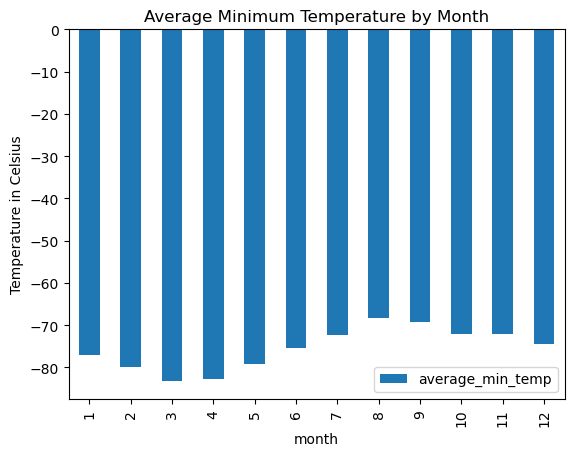

In [275]:
# Plot the average minimum temperature by month
avg_temp_bar = avg_temp_sorted.plot(kind='bar')
avg_temp_bar.set_xlabel("month")
avg_temp_bar.set_ylabel("Temperature in Celsius")

plt.title("Average Minimum Temperature by Month")
plt.tight_layout
plt.show()

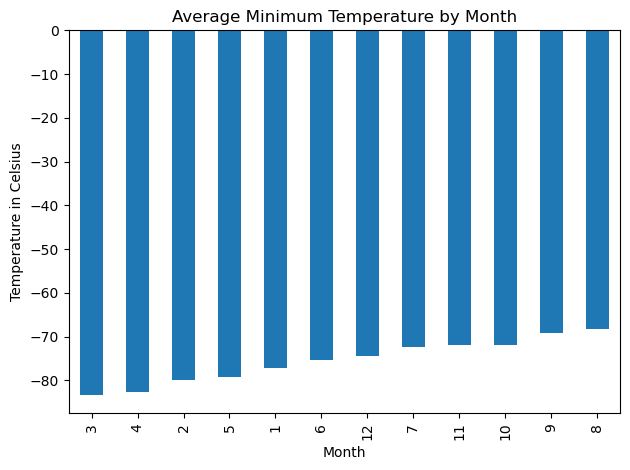

In [238]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
# Sort the average temperature DataFrame by average_min_temp
avg_temp_sorted = avg_temp.sort_values(by='average_min_temp')

# Plot the average minimum temperature by month
avg_temp_bar = avg_temp_sorted.plot(kind='bar', x='month', y='average_min_temp', legend=False)
avg_temp_bar.set_xlabel("Month")
avg_temp_bar.set_ylabel("Temperature in Celsius")

plt.title("Average Minimum Temperature by Month")
plt.tight_layout()
plt.show()

In [276]:
# 4. What is the average pressure by month?
# Convert the 'pressure' column to numeric, forcing errors to NaN
mars_table_df['pressure'] = pd.to_numeric(mars_table_df['pressure'], errors='coerce')
avg_pressure = mars_table_df.groupby("month")["pressure"].mean().reset_index()

# Convert pressure to integer to ensure proper sorting
avg_pressure['month'] = avg_pressure['month'].astype(int)

# Sort the average temperature DataFrame by month
avg_pressure_sorted = avg_pressure.sort_values(by='month')
avg_pressure_sorted = avg_pressure_sorted.set_index("month")

# Display the sorted results
print(avg_pressure_sorted)

         pressure
month            
1      862.488506
2      889.455056
3      877.322917
4      806.329897
5      748.557047
6      745.054422
7      795.105634
8      873.829787
9      913.305970
10     887.312500
11     857.014493
12     842.156627


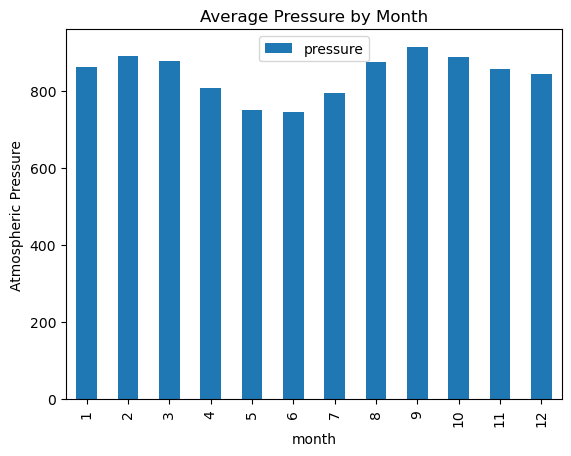

In [277]:
# Plot the average pressure by month
avg_pressure_bar = avg_pressure_sorted.plot(kind='bar')
avg_pressure_bar.set_xlabel("month")
avg_pressure_bar.set_ylabel("Atmospheric Pressure")
plt.title("Average Pressure by Month")
plt.show()


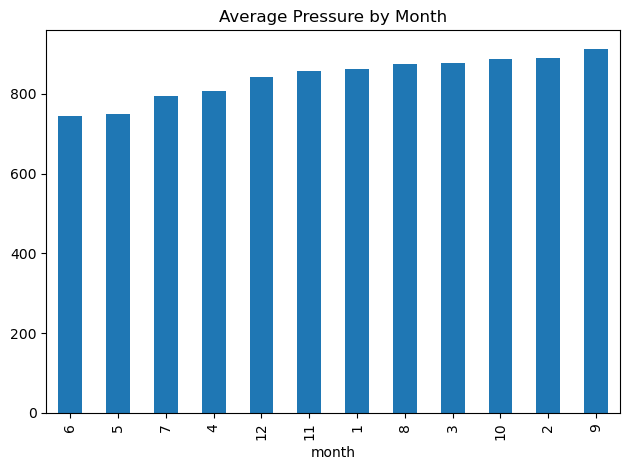

In [278]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph

# Sort the average pressure DataFrame by average_pressure_temp
avg_pressure_sorted = avg_pressure.sort_values(by='pressure')

# Plot the average minimum temperature by month
avg_pressure_bar = avg_pressure_sorted.plot(kind='bar', x='month', y='pressure', legend=False)
avg_temp_bar.set_xlabel("Month")
avg_temp_bar.set_ylabel("Atmospheric Pressure")

plt.title("Average Pressure by Month")
plt.tight_layout()
plt.show()

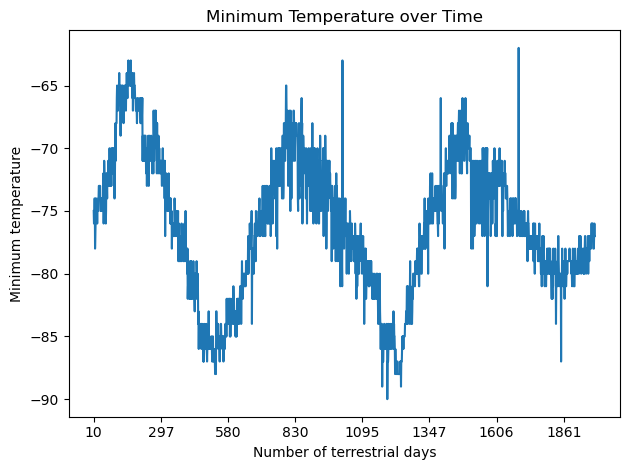

In [279]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
plt.plot(mars_table_df['sol'], mars_table_df['min_temp'])
plt.xlabel("Number of terrestrial days")
plt.ylabel("Minimum temperature")
plt.title("Minimum Temperature over Time")

# Optionally, reduce the number of ticks
plt.xticks(ticks=range(0, len(mars_table_df['sol']), 250))  # Adjust step as needed

plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

#### Minimum Temperature

Overall, the average temperature on Mars, is drastically colder than what we are you use to on planet Earth.  The coldest months on Mars average around negative 80 degrees Celsius, and the the warmest month is around negative 70 degrees Celcius. That is roughly around negative 100 degree fahrenheit. 

#### Atmospheric Pressure

Atmospheric pressure is the lowest on the sixth month at around 725 and highest on the ninth month around 950. For comparison, the average atmospheric pressure on Earth, at sea level (according to google) is 1013.

#### Year Length

YOUR ANALYSIS HERE

By looking at the data, we can determine that year on Mars is longer then a years on Earth.  

Overall,  Mar has thinner atmospheric pressure,  extreme cold temperatures and on average a longer year that Earth. 

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [280]:
# Write the data to a CSV
mars_table_df.to_csv('Mars Scraping.csv', encoding='utf-8')

In [281]:
browser.quit()